In [2]:
import typing
try:
    from typing import TypeAlias
except ImportError:
    from typing_extensions import TypeAlias as _TypeAlias
    typing.TypeAlias = _TypeAlias
    
import flowsom
import cytonormpy as cnp
import os
import pandas as pd
import anndata as ad
import numpy as np

from cytonormpy import FCSFile
import warnings
warnings.simplefilter("always")

In [10]:
def _fcs_to_anndata(input_directory,
                    file,
                    file_no,
                    metadata) -> ad.AnnData:
    fcs = FCSFile(input_directory = input_directory,
                  file_name = file)
    events = fcs.original_events
    md_row = metadata.loc[metadata["file_name"] == file, :].to_numpy()
    obs = np.repeat(md_row, events.shape[0], axis = 0)
    var_frame = fcs.channels
    obs_frame = pd.DataFrame(
        data = obs,
        columns = metadata.columns,
        index = pd.Index([f"{file_no}-{str(i)}" for i in range(events.shape[0])])
    )
    adata = ad.AnnData(
        obs = obs_frame,
        var = var_frame,
        layers = {"compensated": events}
    )
    adata.obs_names_make_unique()
    adata.var_names_make_unique()
    return adata

In [ ]:
input_directory = "C:\\Users\\mfbx2rdb\\OneDrive - The University of Manchester\\PDRA\\Sequencing\\Py scripts\\Projects\\ImmAcc\\gearbox_data\\Batch_fcsdump"
fcs_files = [
    'F11 Batchcontrol3_HC_IFNa2_Mainstain.fcs',
    'G11 Batchcontrol4_HC_LPS_Mainstain.fcs',
    'E11 Batchcontrol3_HC_ns_Mainstain.fcs',
    'H11 Batchcontrol3_HC_PIC_Mainstain.fcs',
    'G8 Batchcontrol_020_20112024_Mainstain.fcs',
    'G9 Batchcontrol_LPS_300_20112024_Mainstain.fcs',
    'G7 Batchcontrol_nostim_001_20112024_Mainstain.fcs',
    'G10 Batchcontrol_PolyIC_040_20112024_Mainstain.fcs',
    'A8 Batchcontrol_PolyIC_Mainstain.fcs',
    'A5 Batchcontrol3_001_Mainstain.fcs',
    'A6 Batchcontrol3_IFNa2_Mainstain.fcs',
    'A7 Batchcontrol3_LPS_Mainstain.fcs',
    'G5 M-003-InP-020_Mainstain.fcs',
    'H5 M-003-InP-300_Mainstain.fcs',
    'F5 M-003-InP-001_Mainstain.fcs',
    'B6 M-005-InP-020_Mainstain.fcs',
    'C6 M-005-InP-300_Mainstain.fcs',
    'A6 M-005-InP-001_Mainstain.fcs',
    'E6 M-008-InP-020_Mainstain.fcs',
    'F6 M-008-InP-300_Mainstain.fcs',
    'D6 M-008-InP-001_Mainstain.fcs',
    'H6 M-009-InP-020_Mainstain.fcs',
    'A7 M-009-InP-300_Mainstain.fcs',
    'G6 M-009-InP-001_Mainstain.fcs',
    'C7 M-011-InP-020_Mainstain.fcs',
    'D7 M-011-InP-300_Mainstain.fcs',
    'B7 M-011-InP-001_Mainstain.fcs',
    'F7 M-014-InP-020_Mainstain.fcs',
    'G7 M-014-InP-300_Mainstain.fcs',
    'E7 M-014-InP-001_Mainstain.fcs',
    'A8 M-015-InP-020_Mainstain.fcs',
    'B8 M-015-InP-300_Mainstain.fcs',
    'H7 M-015-InP-001_Mainstain.fcs',
    'D8 M-028-InP-020_Mainstain.fcs',
    'E8 M-028-InP-300_Mainstain.fcs',
    'C8 M-028-InP-001_Mainstain.fcs',
    'G8 M-030-InP-020_Mainstain.fcs',
    'H8 M-030-InP-300_Mainstain.fcs',
    'F8 M-030-InP-001_Mainstain.fcs',
    'B9 M-032-InP-020_Mainstain.fcs',
    'C9 M-032-InP-300_Mainstain.fcs',
    'A9 M-032-InP-001_Mainstain.fcs',
    'E9 M-033-InP-020_Mainstain.fcs',
    'F9 M-033-InP-300_Mainstain.fcs',
    'D9 M-033-InP-001_Mainstain.fcs',
    'C12 M-069-InP-001_Mainstain.fcs',
    'D1 M-069-InP-020_Mainstain.fcs',
    'D12 M-069-InP-300_Mainstain.fcs',
    'D2 M-069-InP-040_Mainstain.fcs',
    'D3 M-074-InP-001_Mainstain.fcs',
    'D4 M-074-InP-020_Mainstain.fcs',
    'D5 M-074-InP-300_Mainstain.fcs',
    'D6 M-074-InP-040_Mainstain.fcs',
    'D7 M-078-InP-001_Mainstain.fcs',
    'D8 M-078-InP-020_Mainstain.fcs',
    'D9 M-078-InP-300_Mainstain.fcs',
    'D10 M-078-InP-040_Mainstain.fcs',
    'D11 M-080-InP-001_Mainstain.fcs',
    'E1 M-080-InP-020_Mainstain.fcs',
    'E2 M-080-InP-300_Mainstain.fcs',
    'E3 M-080-InP-040_Mainstain.fcs',
    'E4 M-081-InP-001_Mainstain.fcs',
    'E5 M-081-InP-020_Mainstain.fcs',
    'E6 M-081-InP-300_Mainstain.fcs',
    'E7 M-081-InP-040_Mainstain.fcs',
    'E8 M-082-InP-001_Mainstain.fcs',
    'E9 M-082-InP-020_Mainstain.fcs',
    'E10 M-082-InP-300_Mainstain.fcs',
    'E11 M-082-InP-040_Mainstain.fcs',
    'E12 M-083-InP-001_Mainstain.fcs',
    'C2 M-083-InP-020_Mainstain.fcs',
    'F1 M-083-InP-300_Mainstain.fcs',
    'F2 M-083-InP-040_Mainstain.fcs',
    'A1 M-084-InP-001_Mainstain.fcs',
    'A2 M-084-InP-020_Mainstain.fcs',
    'A4 M-084-InP-040_Mainstain.fcs',
    'A3 M-084-InP-300_Mainstain.fcs',
    'A9 M-085-InP-001_Mainstain.fcs',
    'A10 M-085-InP-020_Mainstain.fcs',
    'A12 M-085-InP-040_Mainstain.fcs',
    'A11 M-085-InP-300_Mainstain.fcs',
    'B1 M-087-InP-001_Mainstain.fcs',
    'B2 M-087-InP-020_Mainstain.fcs',
    'B4 M-087-InP-040_Mainstain.fcs',
    'B3 M-087-InP-300_Mainstain.fcs',
    'B5 M-093-InP-001_Mainstain.fcs',
    'B6 M-093-InP-020_Mainstain.fcs',
    'B8 M-093-InP-040_Mainstain.fcs',
    'B7 M-093-InP-300_Mainstain.fcs',
    'B9 M-094-InP-001_Mainstain.fcs',
    'B10 M-094-InP-020_Mainstain.fcs',
    'B12 M-094-InP-040_Mainstain.fcs',
    'B11 M-094-InP-300_Mainstain.fcs',
    'C1 M-096-InP-001_Mainstain.fcs',
    'C2 M-096-InP-020_Mainstain.fcs',
    'C4 M-096-InP-040_Mainstain.fcs',
    'C3 M-096-InP-300_Mainstain.fcs',
    'C5 M-144-InP-001_Mainstain.fcs',
    'C6 M-144-InP-020_Mainstain.fcs',
    'C7 M-144-InP-300_Mainstain.fcs',
    'C12 M-145-InP-001_Mainstain.fcs',
    'D1 M-145-InP-020_Mainstain.fcs',
    'D3 M-145-InP-040_Mainstain.fcs',
    'D2 M-145-InP-300_Mainstain.fcs',
    'C8 M-147-InP-001_Mainstain.fcs',
    'C9 M-147-InP-020_Mainstain.fcs',
    'C11 M-147-InP-040_Mainstain.fcs',
    'C10 M-147-InP-300_Mainstain.fcs',
    'F3 M-149-InP-001_Mainstain.fcs',
    'F4 M-149-InP-020_Mainstain.fcs',
    'F5 M-149-InP-300_Mainstain.fcs',
    'F6 M-149-InP-040_Mainstain.fcs',
]
adatas = []
metadata = pd.read_csv(os.path.join(input_directory, "fcs_metadata_22012025_forcytonormpy-134excel.csv"))
for file_no, file in enumerate(fcs_files):
    adatas.append(
        _fcs_to_anndata(input_directory, file, file_no, metadata)
    )

dataset = ad.concat(adatas, axis = 0, join = "outer", merge = "same")
dataset.obs = dataset.obs.astype("object")
dataset.var = dataset.var.astype("object")
dataset.obs_names_make_unique()
dataset.var_names_make_unique()

In [12]:
dataset

AnnData object with n_obs × n_vars = 27078040 × 46
    obs: 'file_name', 'reference', 'batch', 'sample_ID', 'site'
    var: 'png', 'pne', 'channel_numbers'
    layers: 'compensated'

In [13]:
cn = cnp.CytoNorm()

t = cnp.AsinhTransformer()
fs = cnp.FlowSOM(n_clusters = 10)

cn.add_transformer(t)
cn.add_clusterer(fs)


In [14]:
cn.run_anndata_setup(dataset,
                     layer = "compensated",
                     key_added = "normalized")

In [15]:
cn.run_clustering(cluster_cv_threshold = 2)

In [16]:
cn.calculate_quantiles()
cn.calculate_splines(goal = "batch_mean")
cn.normalize_data(n_jobs=1)

normalized file F11 Batchcontrol3_HC_IFNa2_Mainstain.fcs
normalized file G11 Batchcontrol4_HC_LPS_Mainstain.fcs
normalized file E11 Batchcontrol3_HC_ns_Mainstain.fcs
normalized file H11 Batchcontrol3_HC_PIC_Mainstain.fcs
normalized file G8 Batchcontrol_020_20112024_Mainstain.fcs
normalized file G9 Batchcontrol_LPS_300_20112024_Mainstain.fcs
normalized file G7 Batchcontrol_nostim_001_20112024_Mainstain.fcs
normalized file G10 Batchcontrol_PolyIC_040_20112024_Mainstain.fcs
normalized file A8 Batchcontrol_PolyIC_Mainstain.fcs
normalized file A5 Batchcontrol3_001_Mainstain.fcs
normalized file A6 Batchcontrol3_IFNa2_Mainstain.fcs
normalized file A7 Batchcontrol3_LPS_Mainstain.fcs
normalized file G5 M-003-InP-020_Mainstain.fcs
normalized file H5 M-003-InP-300_Mainstain.fcs
normalized file F5 M-003-InP-001_Mainstain.fcs
normalized file B6 M-005-InP-020_Mainstain.fcs
normalized file C6 M-005-InP-300_Mainstain.fcs
normalized file A6 M-005-InP-001_Mainstain.fcs
normalized file E6 M-008-InP-020_M

In [17]:
dataset

AnnData object with n_obs × n_vars = 27078040 × 46
    obs: 'file_name', 'reference', 'batch', 'sample_ID', 'site'
    var: 'png', 'pne', 'channel_numbers'
    layers: 'compensated', 'normalized'

In [18]:
import cytonormpy as cnp
import warnings

from matplotlib import pyplot as plt

cnpl = cnp.Plotter(cytonorm = cn)

In [19]:
files = cn._datahandler.all_file_names
files

['F11 Batchcontrol3_HC_IFNa2_Mainstain.fcs',
 'G11 Batchcontrol4_HC_LPS_Mainstain.fcs',
 'E11 Batchcontrol3_HC_ns_Mainstain.fcs',
 'H11 Batchcontrol3_HC_PIC_Mainstain.fcs',
 'G8 Batchcontrol_020_20112024_Mainstain.fcs',
 'G9 Batchcontrol_LPS_300_20112024_Mainstain.fcs',
 'G7 Batchcontrol_nostim_001_20112024_Mainstain.fcs',
 'G10 Batchcontrol_PolyIC_040_20112024_Mainstain.fcs',
 'A8 Batchcontrol_PolyIC_Mainstain.fcs',
 'A5 Batchcontrol3_001_Mainstain.fcs',
 'A6 Batchcontrol3_IFNa2_Mainstain.fcs',
 'A7 Batchcontrol3_LPS_Mainstain.fcs',
 'G5 M-003-InP-020_Mainstain.fcs',
 'H5 M-003-InP-300_Mainstain.fcs',
 'F5 M-003-InP-001_Mainstain.fcs',
 'B6 M-005-InP-020_Mainstain.fcs',
 'C6 M-005-InP-300_Mainstain.fcs',
 'A6 M-005-InP-001_Mainstain.fcs',
 'E6 M-008-InP-020_Mainstain.fcs',
 'F6 M-008-InP-300_Mainstain.fcs',
 'D6 M-008-InP-001_Mainstain.fcs',
 'H6 M-009-InP-020_Mainstain.fcs',
 'A7 M-009-InP-300_Mainstain.fcs',
 'G6 M-009-InP-001_Mainstain.fcs',
 'C7 M-011-InP-020_Mainstain.fcs',
 'D7 

In [ ]:
cnp.mad_from_anndata(dataset, dataset.obs['file_name'], dataset.var['pne'], dataset.layers['normalized'])

In [ ]:
cnp.emd_from_anndata(dataset, dataset.obs['file_name'], dataset.var['pne'], dataset.layers['normalized'])

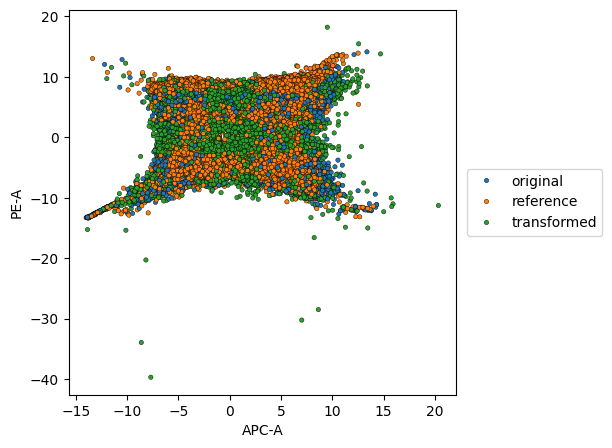

In [33]:
cnpl.scatter(file_name = files[16],
             x_channel = "APC-A",
             y_channel = "PE-A",
             display_reference = True,
             figsize = (5,5),
             s = 10,
             edgecolor = "black",
             linewidth = 0.3)

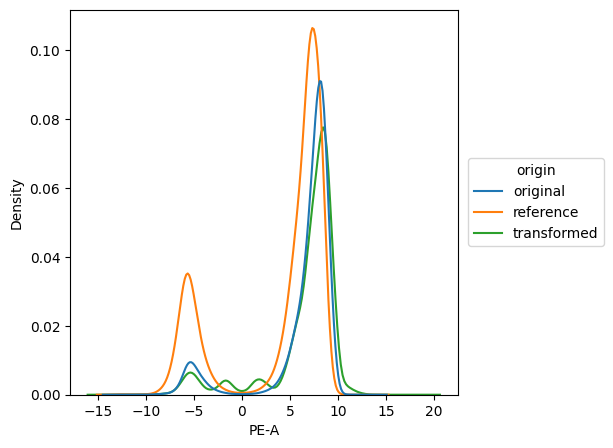

In [ ]:
cnpl.histogram(file_name = files[50],
               x_channel = "RY586-A",
               x_scale = "linear",
               display_reference = True,
               figsize = (5,5))

In [8]:
cnpl.emd(colorby = "improvement", figsize = (3,3), s = 20, edgecolor = "black", linewidth = 0.3)

AttributeError: 'CytoNorm' object has no attribute 'emd_frame'